Leitura do arquivo e pre-processamento dos dados

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

caminho_arquivo = "./Bitcoin_2024-2025_investing.csv"
#caminho_arquivo = "./arquivo_combinado.csv"

df = pd.read_csv(caminho_arquivo, sep=",", encoding="utf-8", header=0)

display(df.head())


df.info()
# Verifica se há valores nulos
display(df.isnull().sum(axis=0))

,Date,Price,Open,High,Low,Vol.,Change %
0,01/08/2025,"95,066.1","96,938.2","97,266.4","92,716.6",101.23K,-1.92%
1,01/07/2025,"96,929.8","102,247.9","102,678.2","96,201.3",99.77K,-5.20%
2,01/06/2025,"102,248.7","98,373.2","102,474.5","97,932.3",86.73K,3.97%
3,01/05/2025,"98,347.7","98,220.1","98,823.1","97,300.0",31.34K,0.13%
4,01/04/2025,"98,219.9","98,168.9","98,742.6","97,568.9",36.56K,0.05%


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      290 non-null    object
 1   Price     290 non-null    object
 2   Open      290 non-null    object
 3   High      290 non-null    object
 4   Low       290 non-null    object
 5   Vol.      290 non-null    object
 6   Change %  290 non-null    object
dtypes: object(7)
memory usage: 16.0+ KB


Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [109]:
# Exclui as colunas timeOpen e timeClose e name

#df.drop(columns=['High', 'Low','Change %'], inplace=True)

display(df.head())

,Date,Price,Open,High,Low,Vol.,Change %
0,01/08/2025,"95,066.1","96,938.2","97,266.4","92,716.6",101.23K,-1.92%
1,01/07/2025,"96,929.8","102,247.9","102,678.2","96,201.3",99.77K,-5.20%
2,01/06/2025,"102,248.7","98,373.2","102,474.5","97,932.3",86.73K,3.97%
3,01/05/2025,"98,347.7","98,220.1","98,823.1","97,300.0",31.34K,0.13%
4,01/04/2025,"98,219.9","98,168.9","98,742.6","97,568.9",36.56K,0.05%


In [110]:
# Converte a coluna timestamp de datetime para date
df["Date"] = pd.to_datetime(df["Date"]).dt.date

display(df.info())

display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      290 non-null    object
 1   Price     290 non-null    object
 2   Open      290 non-null    object
 3   High      290 non-null    object
 4   Low       290 non-null    object
 5   Vol.      290 non-null    object
 6   Change %  290 non-null    object
dtypes: object(7)
memory usage: 16.0+ KB


None

,Date,Price,Open,High,Low,Vol.,Change %
0,2025-01-08,"95,066.1","96,938.2","97,266.4","92,716.6",101.23K,-1.92%
1,2025-01-07,"96,929.8","102,247.9","102,678.2","96,201.3",99.77K,-5.20%
2,2025-01-06,"102,248.7","98,373.2","102,474.5","97,932.3",86.73K,3.97%
3,2025-01-05,"98,347.7","98,220.1","98,823.1","97,300.0",31.34K,0.13%
4,2025-01-04,"98,219.9","98,168.9","98,742.6","97,568.9",36.56K,0.05%


In [111]:
# Move a coluna timestamp para o início do dataframe
# cols = ['timestamp'] + [col for col in df.columns if col != 'timestamp']
# df = df[cols]

# display(df.head())

# df.info()

In [112]:
# seta o timestamp como índice  -- de data do intervalo diario e ordena o dataframe por data    
df.set_index('Date', inplace=True)
#df.sort_index(inplace=True)

display(df.head())

df.info()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2025-01-08,"95,066.1","96,938.2","97,266.4","92,716.6",101.23K,-1.92%
2025-01-07,"96,929.8","102,247.9","102,678.2","96,201.3",99.77K,-5.20%
2025-01-06,"102,248.7","98,373.2","102,474.5","97,932.3",86.73K,3.97%
2025-01-05,"98,347.7","98,220.1","98,823.1","97,300.0",31.34K,0.13%
2025-01-04,"98,219.9","98,168.9","98,742.6","97,568.9",36.56K,0.05%


<class 'pandas.core.frame.DataFrame'>
Index: 290 entries, 2025-01-08 to 2024-03-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     290 non-null    object
 1   Open      290 non-null    object
 2   High      290 non-null    object
 3   Low       290 non-null    object
 4   Vol.      290 non-null    object
 5   Change %  290 non-null    object
dtypes: object(6)
memory usage: 15.9+ KB


In [113]:
df.index.min(), df.index.max()

(datetime.date(2024, 3, 25), datetime.date(2025, 1, 8))

In [114]:
df.isnull().sum(axis=0)

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [115]:
# Convert the 'Price' column to numeric, removing any commas
df["Price"] = df["Price"].str.replace(',', '').astype(float)

df["High"] = df["High"].str.replace(',', '').astype(float)

df["Low"] = df["Low"].str.replace(',', '').astype(float)

df["Open"] = df["Open"].str.replace(',', '').astype(float)

df["Vol."] = df["Vol."].str.replace('K', '').astype(float)

In [116]:
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 290 entries, 2025-01-08 to 2024-03-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     290 non-null    float64
 1   Open      290 non-null    float64
 2   High      290 non-null    float64
 3   Low       290 non-null    float64
 4   Vol.      290 non-null    float64
 5   Change %  290 non-null    object 
dtypes: float64(5), object(1)
memory usage: 15.9+ KB


None

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2025-01-08,95066.1,96938.2,97266.4,92716.6,101.23,-1.92%
2025-01-07,96929.8,102247.9,102678.2,96201.3,99.77,-5.20%
2025-01-06,102248.7,98373.2,102474.5,97932.3,86.73,3.97%
2025-01-05,98347.7,98220.1,98823.1,97300.0,31.34,0.13%
2025-01-04,98219.9,98168.9,98742.6,97568.9,36.56,0.05%


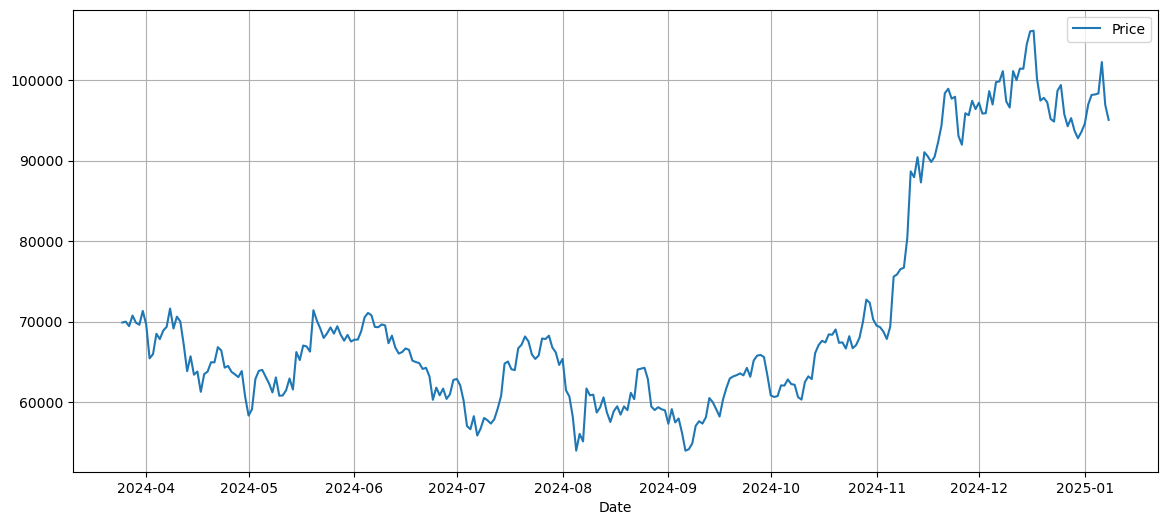

In [117]:
plt.figure(figsize=(14, 6))

#df["open"].plot(label='open')
#df["high"].plot(label='high')
#df["low"].plot(label='low')
df["Price"].plot(label='Price')
plt.grid(True)
plt.legend()
plt.show()

In [118]:
print(round(df["High"].max(), 2))
print(round(df["Low"].min(),  2))
print()
print(round(df["High"].mean(), 2))
print(round(df["Low"].mean(),  2))
print()
print(round(df["High"].std(), 2))
print(round(df["Low"].std(),  2))



108244.9
49486.9

72114.67
69378.51

13978.75
13453.34


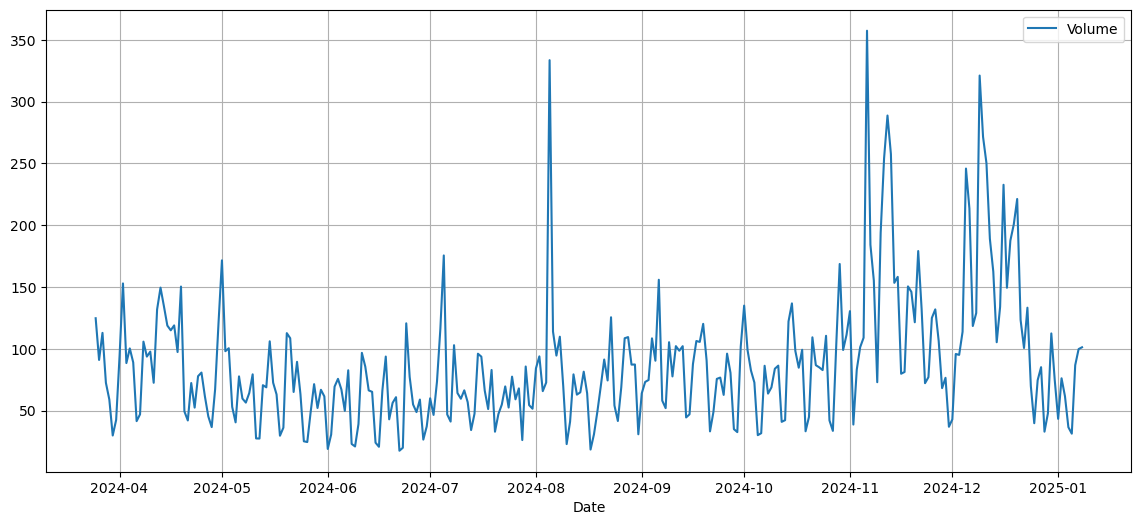

In [119]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

df["Vol."].plot(label='Volume')
#df["marketCap"].plot(label='Market Cap')

plt.grid(True)
plt.legend()
plt.show()

Funcao: Combina todos os arquivos CSV e gera um só:

In [120]:
import pandas as pd
import os

def combinar_csvs(diretorio_atual, arquivo_saida):
    # Lista todos os arquivos no diretório atual
    arquivos = [f for f in os.listdir(diretorio_atual) if f.endswith('.csv')]
    
    # Lista para armazenar dataframes
    dataframes = []

   # Inverte a ordem dos arquivos para concatenar os registros de ordem decrescente de datas
    arquivos = arquivos[::-1]
    
    # Lê cada arquivo CSV e adiciona ao dataframe
    for arquivo in arquivos:
        caminho_arquivo = os.path.join(diretorio_atual, arquivo)
        df = pd.read_csv(caminho_arquivo, sep=",", encoding="utf-8", header=0) # engine='python')
        dataframes.append(df)
    
    # Concatena todos os dataframes
    df_combinado = pd.concat(dataframes, ignore_index=False) #, axis=0, ignore_index=True)
    
    # Salva o dataframe combinado em um novo arquivo CSV
    df_combinado.to_csv(arquivo_saida, sep=";", index=False)
    
    return df_combinado

# Exemplo de uso
diretorio_atual = os.getcwd()
arquivo_saida   = 'arquivo_combinado.csv'
df_combinado    = combinar_csvs(diretorio_atual, arquivo_saida)

print(f"Arquivo combinado salvo como {arquivo_saida}")
df_combinado.head()

Arquivo combinado salvo como arquivo_combinado.csv


,Date,Price,Open,High,Low,Vol.,Change %
0,01/08/2025,"95,066.1","96,938.2","97,266.4","92,716.6",101.23K,-1.92%
1,01/07/2025,"96,929.8","102,247.9","102,678.2","96,201.3",99.77K,-5.20%
2,01/06/2025,"102,248.7","98,373.2","102,474.5","97,932.3",86.73K,3.97%
3,01/05/2025,"98,347.7","98,220.1","98,823.1","97,300.0",31.34K,0.13%
4,01/04/2025,"98,219.9","98,168.9","98,742.6","97,568.9",36.56K,0.05%


Teste da função ponto a ponto: